In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
dataset = pd.read_csv("./dataset/train.csv")
testDataset = pd.read_csv("./dataset/test.csv")

In [201]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
pet_id            18834 non-null object
issue_date        18834 non-null object
listing_date      18834 non-null object
condition         17357 non-null float64
color_type        18834 non-null object
length(m)         18834 non-null float64
height(cm)        18834 non-null float64
X1                18834 non-null int64
X2                18834 non-null int64
breed_category    18834 non-null float64
pet_category      18834 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [202]:
dataset.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [203]:
dataset.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


## let's see the value counts in Condition

In [204]:
dataset['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

## lets see this missing values in heat map

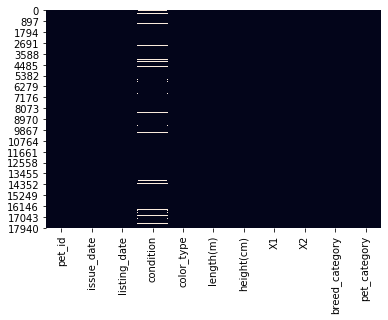

In [205]:
sns.heatmap(dataset.isnull(),cbar=False)

## let's delete the missing values for now

In [206]:
dataset.dropna(axis=0,inplace=True)

In [207]:
dataset.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17357 entries, 0 to 18833
Data columns (total 11 columns):
pet_id            17357 non-null object
issue_date        17357 non-null object
listing_date      17357 non-null object
condition         17357 non-null float64
color_type        17357 non-null object
length(m)         17357 non-null float64
height(cm)        17357 non-null float64
X1                17357 non-null int64
X2                17357 non-null int64
breed_category    17357 non-null float64
pet_category      17357 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [209]:
dataset.shape

(17357, 11)

In [210]:
testDataset.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [211]:
testDataset['condition'].mode()[0]

1.0

In [212]:
testDataset['condition'].fillna(testDataset['condition'].mode()[0],inplace = True)

In [213]:
testDataset.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [214]:
testDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
pet_id          8072 non-null object
issue_date      8072 non-null object
listing_date    8072 non-null object
condition       8072 non-null float64
color_type      8072 non-null object
length(m)       8072 non-null float64
height(cm)      8072 non-null float64
X1              8072 non-null int64
X2              8072 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [215]:
totalDataset = pd.concat([dataset,testDataset],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [216]:
totalDataset.shape

(25429, 11)

In [217]:
testDataset.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [218]:
dataset.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
5,ANSL_52200,2017-10-25 00:00:00,2019-03-10 13:18:00,0.0,Red,0.92,29.56,0,7,1.0,2


In [219]:
totalDataset.head()

,X1,X2,breed_category,color_type,condition,height(cm),issue_date,length(m),listing_date,pet_category,pet_id
0,13,9,0.0,Brown Tabby,2.0,7.78,2016-07-10 00:00:00,0.80,2016-09-21 16:25:00,1.0,ANSL_69903
1,13,9,0.0,White,1.0,14.19,2013-11-21 00:00:00,0.72,2018-12-27 17:47:00,2.0,ANSL_66892
3,0,1,0.0,White,1.0,17.82,2016-12-31 00:00:00,0.62,2019-01-25 18:30:00,2.0,ANSL_71623
4,18,4,0.0,Black,2.0,11.06,2017-09-28 00:00:00,0.50,2017-11-19 09:38:00,1.0,ANSL_57969
5,0,7,1.0,Red,0.0,29.56,2017-10-25 00:00:00,0.92,2019-03-10 13:18:00,2.0,ANSL_52200


In [220]:
totalDataset.isnull().sum()

X1                   0
X2                   0
breed_category    8072
color_type           0
condition            0
height(cm)           0
issue_date           0
length(m)            0
listing_date         0
pet_category      8072
pet_id               0
dtype: int64

In [221]:
totalDataset.head()

,X1,X2,breed_category,color_type,condition,height(cm),issue_date,length(m),listing_date,pet_category,pet_id
0,13,9,0.0,Brown Tabby,2.0,7.78,2016-07-10 00:00:00,0.80,2016-09-21 16:25:00,1.0,ANSL_69903
1,13,9,0.0,White,1.0,14.19,2013-11-21 00:00:00,0.72,2018-12-27 17:47:00,2.0,ANSL_66892
3,0,1,0.0,White,1.0,17.82,2016-12-31 00:00:00,0.62,2019-01-25 18:30:00,2.0,ANSL_71623
4,18,4,0.0,Black,2.0,11.06,2017-09-28 00:00:00,0.50,2017-11-19 09:38:00,1.0,ANSL_57969
5,0,7,1.0,Red,0.0,29.56,2017-10-25 00:00:00,0.92,2019-03-10 13:18:00,2.0,ANSL_52200


In [222]:
totalDataset.drop(['issue_date','listing_date','pet_id'],axis=1, inplace=True)

In [223]:
totalDataset.head()

,X1,X2,breed_category,color_type,condition,height(cm),length(m),pet_category
0,13,9,0.0,Brown Tabby,2.0,7.78,0.80,1.0
1,13,9,0.0,White,1.0,14.19,0.72,2.0
3,0,1,0.0,White,1.0,17.82,0.62,2.0
4,18,4,0.0,Black,2.0,11.06,0.50,1.0
5,0,7,1.0,Red,0.0,29.56,0.92,2.0


In [224]:
def category_onehot_multcols(multcolumns):
    df_final=totalDataset
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(totalDataset[fields],drop_first=True)
        
        totalDataset.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([totalDataset,df_final],axis=1)
        
    return df_final

In [225]:
totalDataset=category_onehot_multcols(['color_type','condition'])

color_type
condition


In [226]:
totalDataset.shape

(25429, 63)

In [227]:
totalDataset =totalDataset.loc[:,~totalDataset.columns.duplicated()]

In [228]:
totalDataset.shape

(25429, 63)

In [229]:
totalDataset.head()

,X1,X2,breed_category,height(cm),length(m),pet_category,Apricot,Black,Black Brindle,Black Smoke,...,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle,1.0,2.0
0,13,9,0.0,7.78,0.80,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13,9,0.0,14.19,0.72,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,0.0,17.82,0.62,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,18,4,0.0,11.06,0.50,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,7,1.0,29.56,0.92,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
trainSet = totalDataset.iloc[:17357,:] 
testSet = totalDataset.iloc[17357:,:] 

In [231]:
trainSet.shape, testSet.shape

((17357, 63), (8072, 63))

## let's build our target variables

In [232]:
y_train_pet = trainSet['pet_category']
y_train_breed = trainSet['breed_category']

In [233]:
X_train = trainSet.drop(['pet_category','breed_category'],axis=1)

In [234]:
X_test = testSet.drop(['pet_category','breed_category'],axis=1)

In [235]:
X_train.head()

,X1,X2,height(cm),length(m),Apricot,Black,Black Brindle,Black Smoke,Black Tabby,Black Tiger,...,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle,1.0,2.0
0,13,9,7.78,0.80,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13,9,14.19,0.72,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,17.82,0.62,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,18,4,11.06,0.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,7,29.56,0.92,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
X_train = np.array(X_train)

## feature scaling

In [237]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:4] = sc.fit_transform(X_train[:, :4])

In [238]:
X_test = np.array(X_test)

In [239]:
X_test[:,:4] = sc.transform(X_test[:, :4])

In [110]:
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy
from sklearn import metrics
#lets run from k = 1 to k=25 
k_range = range(1,26)
accuracy_score = {}
test_acc_score = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train_pet)
    y_pred = knn.predict(X_train)
    accuracy_score[k] = metrics.accuracy_score(y_train_pet,y_pred)

{1: 1.0, 2: 0.9373163565132223, 3: 0.9368554473699372, 4: 0.9226248775710089, 5: 0.9218182865702599, 6: 0.9140404447773233, 7: 0.9121968082041827, 8: 0.9080486259146165, 9: 0.9091432851299187, 10: 0.9051103301261739, 11: 0.905744080198191, 12: 0.903497148124676, 13: 0.9048222619116206, 14: 0.9011926024082503, 15: 0.9013654433369822, 16: 0.9003283977645906, 17: 0.8980814656910756, 18: 0.8991185112634672, 19: 0.9003860114075013, 20: 0.8985423748343607, 21: 0.8966987382612203, 22: 0.8968715791899522, 23: 0.898196692976897, 24: 0.898196692976897, 25: 0.898196692976897}


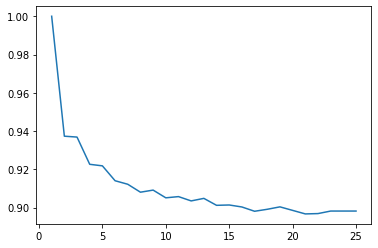

In [240]:
plt.plot(k_range,list(accuracy_score.values()))
print(accuracy_score)

In [241]:
final_knn = KNeighborsClassifier(n_neighbors=3)
final_knn.fit(X_train,y_train_pet)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [113]:
from sklearn.neighbors import KNeighborsClassifier
#import metrics model to check the accuracy
from sklearn import metrics
#lets run from k = 1 to k=25 
k_range = range(1,26)
accuracy_score = {}
test_acc_score = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train_breed)
    y_pred = knn.predict(X_train)
    accuracy_score[k] = metrics.accuracy_score(y_train_breed,y_pred)

{1: 1.0, 2: 0.9373163565132223, 3: 0.9368554473699372, 4: 0.9226248775710089, 5: 0.9218182865702599, 6: 0.9140404447773233, 7: 0.9121968082041827, 8: 0.9080486259146165, 9: 0.9091432851299187, 10: 0.9051103301261739, 11: 0.905744080198191, 12: 0.903497148124676, 13: 0.9048222619116206, 14: 0.9011926024082503, 15: 0.9013654433369822, 16: 0.9003283977645906, 17: 0.8980814656910756, 18: 0.8991185112634672, 19: 0.9003860114075013, 20: 0.8985423748343607, 21: 0.8966987382612203, 22: 0.8968715791899522, 23: 0.898196692976897, 24: 0.898196692976897, 25: 0.898196692976897}


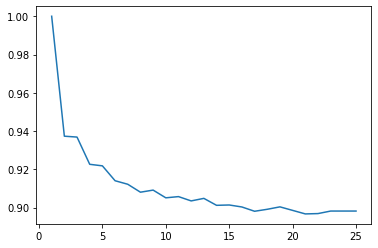

In [168]:
plt.plot(k_range,list(accuracy_score.values()))
print(accuracy_score)

In [242]:
final_knn_breed = KNeighborsClassifier(n_neighbors=3)
final_knn_breed.fit(X_train,y_train_breed)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [243]:
X_test = np.array(X_test)

In [244]:
y_pred_pet = final_knn.predict(X_test)

In [245]:
y_pred_breed = final_knn_breed.predict(X_test)

In [247]:
testDataset = pd.read_csv("./dataset/test.csv")
testDataset.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [248]:
sub_df = pd.DataFrame({'pet_id': testDataset['pet_id'], 'breed_category': y_pred_breed,'pet_category':y_pred_pet})
sub_df.to_csv('submit.csv', index=False)

In [250]:
submit = pd.read_csv('submit.csv')

In [251]:
submit

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2.0
1,ANSL_76663,0.0,1.0
2,ANSL_58259,0.0,1.0
3,ANSL_67171,0.0,2.0
4,ANSL_72871,0.0,2.0
...,...,...,...
8067,ANSL_66809,1.0,2.0
8068,ANSL_59041,1.0,2.0
8069,ANSL_60034,1.0,2.0
8070,ANSL_58066,0.0,2.0
